In [1]:
%pip install pylas laspy numpy matplotlib open3d

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install lazrs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import laspy

las = laspy.read("/home/inesh/LiDAR/autzen.laz")  # Read .laz file
las.write("autzen.las")  # Convert to .las

In [5]:
# Grab just the X dimension from the file, and scale it.

def scaled_x_dimension(las_file):
    x_dimension = las_file.X
    scale = las_file.header.scales[0]
    offset = las_file.header.offsets[0]
    return (x_dimension * scale) + offset

scaled_x = scaled_x_dimension(las)

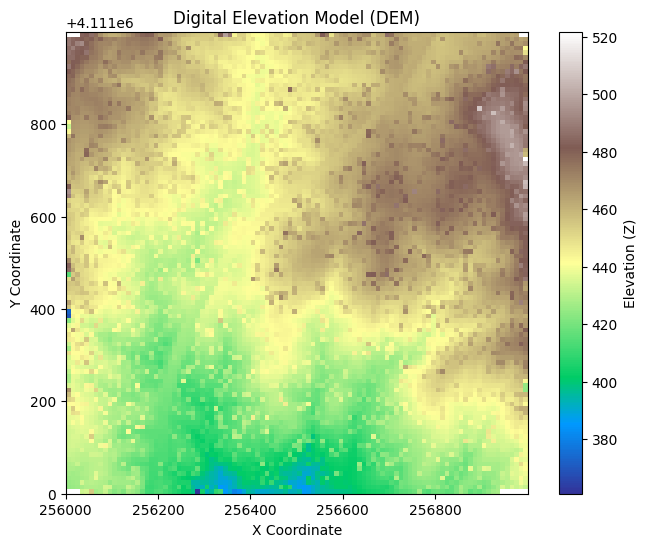

In [ ]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load LAS file
las = laspy.read("autzen.las")  # Read .laz file
points = np.vstack((las.x, las.y, las.z)).T

# Define grid size
grid_x, grid_y = np.mgrid[min(las.x):max(las.x):100j, min(las.y):max(las.y):100j]

# Interpolate using griddata
grid_z = griddata(points[:, :2], points[:, 2], (grid_x, grid_y), method='cubic')

# Plot the DEM
plt.figure(figsize=(8, 6))
plt.imshow(grid_z.T, extent=(min(las.x), max(las.x), min(las.y), max(las.y)), origin='lower', cmap='terrain')
plt.colorbar(label="Elevation (Z)")
plt.title("Digital Elevation Model (DEM)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()
